In [1]:
import re
import os
import time
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.compat.v1 import ConfigProto, InteractiveSession
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
classes = os.listdir('../input/bbc-news-summary/BBC News Summary/News Articles')
Articles_dir = '../input/bbc-news-summary/BBC News Summary/News Articles/'
Summaries_dir = '../input/bbc-news-summary/BBC News Summary/Summaries/'

articles = []
summaries = []
file_arr = []
for cls in classes:
    files = os.listdir(Articles_dir + cls)
    for file in files:
        article_file_path = Articles_dir + cls + '/' + file
        summary_file_path = Summaries_dir + cls + '/' + file
        try:
            with open (article_file_path,'r') as f:
                articles.append('.'.join([line.rstrip() for line in f.readlines()]))
            with open (summary_file_path,'r') as f:
                summaries.append('.'.join([line.rstrip() for line in f.readlines()]))
            file_arr.append(cls + '/' + file)
        except:
            pass
            
dataset = pd.DataFrame({'File_path':file_arr,'Articles': articles,'Summaries':summaries})
# dataset['Articles'][0]
dataset.head()

,File_path,Articles,Summaries
0,politics/361.txt,Budget to set scene for election..Gordon Brown...,- Increase in the stamp duty threshold from £6...
1,politics/245.txt,Army chiefs in regiments decision..Military ch...,"""They are very much not for the good and will ..."
2,politics/141.txt,Howard denies split over ID cards..Michael How...,Michael Howard has denied his shadow cabinet w...
3,politics/372.txt,Observers to monitor UK election..Ministers wi...,The report said individual registration should...
4,politics/333.txt,Kilroy names election seat target..Ex-chat sho...,"UKIP's leader, Roger Knapman, has said he is g..."


In [3]:
dataset.shape

(2224, 3)

In [4]:
contractions_dictionary = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}


In [5]:
from string import digits
import re

def Filter(text):
#     pattern = r'[0-9]'

# # Match all digits in the string and replace them with an empty string
#     text = re.sub(pattern, '', text)
#     remove_digits = str.maketrans('', '', digits)
#     text = text.translate(remove_digits)
    text=text.lower()
    text=' '.join([contractions_dictionary[i] if i in contractions_dictionary.keys() else i for i in text.split()])
    text=re.sub(r'\(.*\)',"",text)
    text=re.sub("'s","",text)
    text=re.sub('"','',text)
    text=' '.join([i for i in text.split() if i.isalpha()])
    text=re.sub('[^a-zA-Z]'," ",text)
    
    return text

dataset['File_path'] = dataset['File_path'].apply(Filter)
dataset['Articles'] = dataset['Articles'].apply(Filter)
dataset['Summaries'] = dataset['Summaries'].apply(Filter)


In [6]:
dataset.shape

(2224, 3)

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 3000
embedding_dim = 100
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 2000

articles_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
articles_tokenizer.fit_on_texts(dataset['Articles'])

summaries_tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
summaries_tokenizer.fit_on_texts(dataset['Summaries'])

# word_index = tokenizer.word_index

training_sequences = articles_tokenizer.texts_to_sequences(dataset['Articles'])
training_x_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

training_sequences = summaries_tokenizer.texts_to_sequences(dataset['Summaries'])
training_y_padded = pad_sequences(training_sequences, maxlen=30, padding=padding_type, truncating=trunc_type)

In [8]:
training_x_padded.shape

(2224, 100)

In [9]:
NUM_TRAIN = 2224
article_map = dict(map(reversed, articles_tokenizer.word_index.items()))
summaries_map = dict(map(reversed, summaries_tokenizer.word_index.items()))

article = np.zeros((NUM_TRAIN,100,vocab_size))
summ = np.zeros((NUM_TRAIN,30,vocab_size))
summ_target = np.zeros((NUM_TRAIN,30,vocab_size))
for i,sequence in enumerate(training_x_padded):
    for j,word in enumerate(sequence):
        article[i,j,word ] = 1
        
for i,sequence in enumerate(training_y_padded):
    for j,word in enumerate(sequence):
        summ[i,j,word] = 1
        if j>0:
            summ_target[i,j-1,word] = 1

In [10]:
article.shape

(2224, 100, 3000)

In [11]:
training_x = article
training_y = summ
training_y_target = summ_target
# testing_x_padded = np.array(testing_x_padded)
# testing_y_padded = np.array(testing_y_padded)

print(training_x.shape)
print(training_y.shape)
print(training_y_target.shape)

(2224, 100, 3000)
(2224, 30, 3000)
(2224, 30, 3000)


In [12]:
encoder_inputs = tf.keras.layers.Input(shape=(None, vocab_size))
encoder = tf.keras.layers.LSTM(embedding_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]


decoder_inputs = tf.keras.layers.Input(shape=(None, vocab_size))
decoder_lstm = tf.keras.layers.LSTM(embedding_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = tf.keras.layers.Dense(vocab_size, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

model = tf.keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.summary()

2022-08-28 10:36:54.630027: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:36:54.767263: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:36:54.768073: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-28 10:36:54.769960: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 3000)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 3000)] 0                                            
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 100), (None, 1240400     input_1[0][0]                    
__________________________________________________________________________________________________
lstm_1 (LSTM)                   [(None, None, 100),  1240400     input_2[0][0]                    
                                                                 lstm[0][1]                   

In [13]:
model.fit([training_x,training_y],training_y_target,
          epochs=300,
          batch_size=64,
          callbacks = [tf.keras.callbacks.CSVLogger('./training.csv')]
          )

2022-08-28 10:37:00.031575: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2668800000 exceeds 10% of free system memory.
2022-08-28 10:37:03.692780: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 800640000 exceeds 10% of free system memory.
2022-08-28 10:37:05.178368: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 800640000 exceeds 10% of free system memory.
2022-08-28 10:37:06.083979: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 2668800000 exceeds 10% of free system memory.
2022-08-28 10:37:08.212757: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 800640000 exceeds 10% of free system memory.
2022-08-28 10:37:09.632301: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2022-08-28 10:37:13.238912: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


35/35 [==============================] - 8s 87ms/step - loss: 6.9803 - accuracy: 0.0990
Epoch 2/300
35/35 [==============================] - 3s 85ms/step - loss: 5.7275 - accuracy: 0.1084
Epoch 3/300
35/35 [==============================] - 3s 91ms/step - loss: 5.6975 - accuracy: 0.1084
Epoch 4/300
35/35 [==============================] - 3s 84ms/step - loss: 5.6941 - accuracy: 0.1084
Epoch 5/300
35/35 [==============================] - 3s 84ms/step - loss: 5.6927 - accuracy: 0.1084
Epoch 6/300
35/35 [==============================] - 3s 95ms/step - loss: 5.6911 - accuracy: 0.1084
Epoch 7/300
35/35 [==============================] - 4s 100ms/step - loss: 5.6888 - accuracy: 0.1084
Epoch 8/300
35/35 [==============================] - 3s 87ms/step - loss: 5.6840 - accuracy: 0.1084
Epoch 9/300
35/35 [==============================] - 3s 88ms/step - loss: 5.6779 - accuracy: 0.1084
Epoch 10/300
35/35 [==============================] - 3s 89ms/step - loss: 5.6721 - accuracy: 0.1084
Epoch 11/3

In [18]:
model.save('model.h5')
model.save_weights('./my_checkpoint')

encoder_model = tf.keras.Model(encoder_inputs, encoder_states)
decoder_state_input_h = tf.keras.layers.Input(shape = (embedding_dim,))
decoder_state_input_c = tf.keras.layers.Input(shape = (embedding_dim,))

decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state = decoder_states_inputs)
decoder_states = [state_h, state_c]
decoder_outputs = decoder_dense(decoder_outputs)

decoder_model = tf.keras.Model([decoder_inputs] + decoder_states_inputs, [decoder_outputs] + decoder_states)

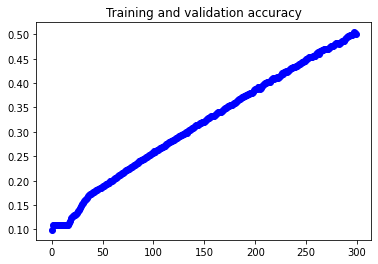

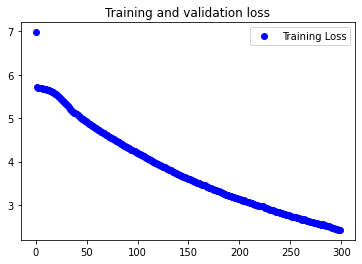

In [19]:
## Visualising the Accuracy and loss plots

callback_csv = pd.read_csv('./training.csv')
acc = callback_csv['accuracy']
loss = callback_csv['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')

plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()

In [20]:
#Define Decode Sequence
def decode_sequence(input_seq):
    #Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)

    #Generate empty target sequence of length 1.
    target_seq = np.zeros((1, 1, 3000))
    #Get the first character of target sequence with the start character.
    target_seq[0, 0, summaries_tokenizer.word_index['<OOV>']] = 1.

    #Sampling loop for a batch of sequences
    #(to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        #Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = summaries_map[sampled_token_index]
        decoded_sentence += ' '+ sampled_char
        
        #Exit condition: either hit max length
        #or find stop character.
        if (sampled_char == '\n' or
           len(decoded_sentence) > 70):
            stop_condition = True

        #Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, 3000))
        target_seq[0, 0, sampled_token_index] = 1.

        #Update states
        states_value = [h, c]

    return decoded_sentence


In [21]:
for seq_index in range(10):
    input_seq = training_x[seq_index: seq_index + 1]
    decoded_sentence = decode_sequence(input_seq)
    print('-')
    print('Input sentence:', dataset['Articles'][seq_index])
    print('Decoded sentence:', decoded_sentence)

-
Input sentence: budget to set scene for brown will seek to put the economy at the centre of labour bid for a third term in power when he delivers his ninth budget at he is expected to stress the importance of continued economic with low unemployment and interest the chancellor is expected to freeze petrol duty and raise the stamp duty threshold from but the conservatives and lib dems insist voters face higher taxes and more under officials have said there will not be a but mr brown is thought to have about to increase in the stamp duty threshold from a freeze on petrol an extension of tax credit scheme for poorer possible help for pensioners the stamp duty threshold rise is intended to help first time buyers a likely theme of all three of the main general election ten years buyers had a much greater chance of avoiding stamp with close to half a million in england and wales selling for less than since average uk property prices have more than doubled while the starting threshold for s

In [22]:
encoder_model.save('encoder.h5')
decoder_model.save('decoder.h5')